In [3]:
 #必要なライブラリを読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
% matplotlib inline

In [4]:
# csvファイル読み込み
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv("test.csv")

In [5]:
df_train.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'Street_Grvl', 'Street_Pave', 'Utilities_AllPub',
       'Utilities_NoSeWa', 'SalePrice'],
      dtype='object', length=271)

In [7]:
df_train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,SalePrice
0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,208500
1,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,181500
2,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,223500
3,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,272.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,140000
4,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,250000


In [6]:
#descriptive statistics summary# 目的変数を確認
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [11]:
# DataFrameからの列だけを取り出す
df_train.loc[:, ['SalePrice']].head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [17]:
# 'SalePrice'のデータをarray型に変換
X = np.array(df_train.loc[:, ['SalePrice']])

In [18]:
# 変換されたことを確認
X

array([[208500],
       [181500],
       [223500],
       ..., 
       [266500],
       [142125],
       [147500]])

In [19]:
# 'GarageCars'のデータをarray型に変換
y = np.array(df_train.loc[:, ['GarageCars']])

In [20]:
# 変換されたことを確認
y

array([[ 2.],
       [ 2.],
       [ 2.],
       ..., 
       [ 1.],
       [ 1.],
       [ 1.]])

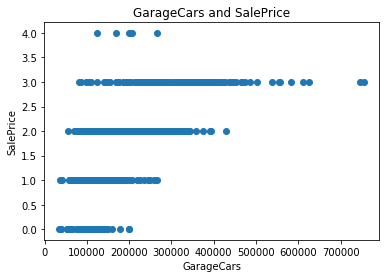

In [25]:
# 散布図を出力
# 直線的な関係が確認できる           
plt.scatter(X, y)                   # 散布図を表示
plt.title('GarageCars and SalePrice')   # タイトルを表示
plt.xlabel('SalePrice')              # x軸のラベルを表示
plt.ylabel('GarageCars')              # y軸のラベルを表示
plt.show()                          # 指定した内容でグラフを出力

In [24]:
# 相関係数行列を確認
df_train.corr

<bound method DataFrame.corr of       1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0        856.0     854.0        0.0           3.0       706.0         0.0   
1       1262.0       0.0        0.0           3.0       978.0         0.0   
2        920.0     866.0        0.0           3.0       486.0         0.0   
3        961.0     756.0        0.0           3.0       216.0         0.0   
4       1145.0    1053.0        0.0           4.0       655.0         0.0   
5        796.0     566.0      320.0           1.0       732.0         0.0   
6       1694.0       0.0        0.0           3.0      1369.0         0.0   
7       1107.0     983.0        0.0           3.0       859.0        32.0   
8       1022.0     752.0        0.0           2.0         0.0         0.0   
9       1077.0       0.0        0.0           2.0       851.0         0.0   
10      1040.0       0.0        0.0           3.0       906.0         0.0   
11      1182.0    1142.0        0.0         